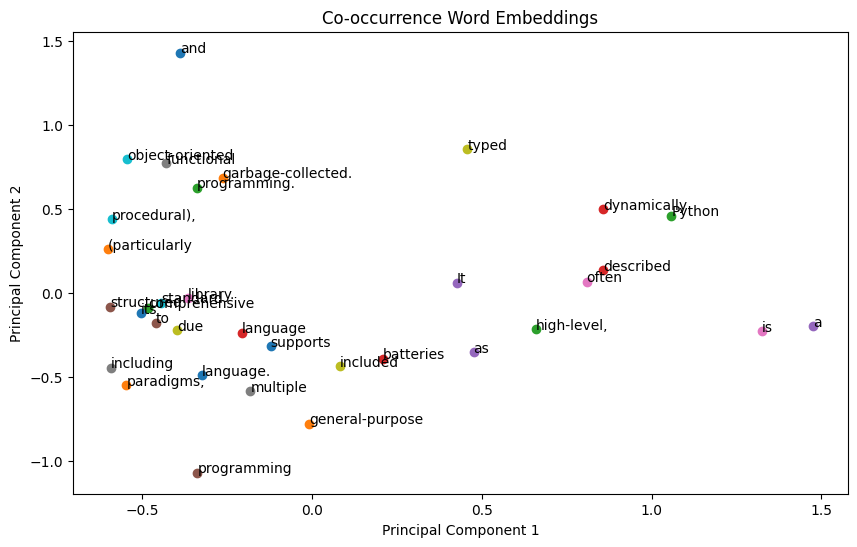

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA

# Sample corpus
corpus = [
    "Python is a high-level, general-purpose programming language.",
    "Python is dynamically typed and garbage-collected.",
    "It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.",
    "It is often described as a batteries included language due to its comprehensive standard library."
]

# Function to generate co-occurrence matrix
def generate_co_occurrence_matrix(corpus, window_size=2):
    co_occurrence_matrix = defaultdict(int)
    vocabulary = set()

    for sentence in corpus:
        words = sentence.split()
        for i, word in enumerate(words):
            vocabulary.add(word)
            for j in range(max(i - window_size, 0), min(i + window_size, len(words))):
                if i != j:
                    co_occurrence_matrix[(word, words[j])] += 1

    return co_occurrence_matrix, list(vocabulary)

# Function to plot co-occurrence word embeddings
def plot_co_occurrence_word_embeddings(matrix, vocabulary):
    pca = PCA(n_components=2)
    word_vectors = pca.fit_transform(matrix)

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(vocabulary):
        plt.scatter(word_vectors[i, 0], word_vectors[i, 1])
        plt.text(word_vectors[i, 0], word_vectors[i, 1], word)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Co-occurrence Word Embeddings')
    plt.show()

# Generate co-occurrence matrix
co_occurrence_matrix, vocabulary = generate_co_occurrence_matrix(corpus)

# Convert co-occurrence matrix to numpy array
vocab_size = len(vocabulary)
co_occurrence_array = np.zeros((vocab_size, vocab_size))
for (word1, word2), count in co_occurrence_matrix.items():
    if word1 in vocabulary and word2 in vocabulary:
        i = vocabulary.index(word1)
        j = vocabulary.index(word2)
        co_occurrence_array[i][j] = count

# Plot co-occurrence word embeddings
plot_co_occurrence_word_embeddings(co_occurrence_array, vocabulary)


In [2]:
def extract_word_types(corpus):
    word_types = set()
    for sentence in corpus:
        words = sentence.split()
        word_types.update(words)
    return word_types

# Example usage:
distinct_words = extract_word_types(corpus)
print("Distinct words in the corpus:", distinct_words)


Distinct words in the corpus: {'and', 'paradigms,', 'comprehensive', 'dynamically', 'a', 'programming', 'often', 'including', 'due', 'procedural),', 'language.', 'general-purpose', 'Python', 'batteries', 'It', 'structured', 'library.', 'multiple', 'typed', 'object-oriented', 'its', '(particularly', 'high-level,', 'described', 'as', 'to', 'is', 'functional', 'included', 'standard', 'supports', 'garbage-collected.', 'programming.', 'language'}


In [3]:
import numpy as np
from collections import defaultdict

def construct_co_occurrence_matrix(corpus, window_size=4):
    co_occurrence_matrix = defaultdict(int)
    vocabulary = set()

    for sentence in corpus:
        words = sentence.split()
        for i, target_word in enumerate(words):
            vocabulary.add(target_word)
            context_words = words[max(0, i - window_size): i] + words[i + 1: min(i + window_size + 1, len(words))]
            for context_word in context_words:
                co_occurrence_matrix[(target_word, context_word)] += 1

    vocab_list = list(vocabulary)
    co_occurrence_array = np.zeros((len(vocab_list), len(vocab_list)))

    for (word1, word2), count in co_occurrence_matrix.items():
        i = vocab_list.index(word1)
        j = vocab_list.index(word2)
        co_occurrence_array[i][j] = count

    return co_occurrence_array, vocab_list

# Example usage:
corpus = [
    "Python is a high-level, general-purpose programming language.",
    "Python is dynamically typed and garbage-collected.",
    "It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.",
    "It is often described as a batteries included language due to its comprehensive standard library."
]

co_occurrence_matrix, vocabulary = construct_co_occurrence_matrix(corpus)
print("Co-occurrence matrix:")
print(co_occurrence_matrix)
print("Vocabulary:")
print(vocabulary)


Co-occurrence matrix:
[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Vocabulary:
['and', 'paradigms,', 'comprehensive', 'dynamically', 'a', 'programming', 'often', 'including', 'due', 'procedural),', 'language.', 'general-purpose', 'Python', 'batteries', 'It', 'structured', 'library.', 'multiple', 'typed', 'object-oriented', 'its', '(particularly', 'high-level,', 'described', 'as', 'to', 'is', 'functional', 'included', 'standard', 'supports', 'garbage-collected.', 'programming.', 'language']


In [4]:
from sklearn.decomposition import PCA

def reduce_dimensionality(co_occurrence_matrix, k):
    pca = PCA(n_components=k)
    embeddings = pca.fit_transform(co_occurrence_matrix)
    return embeddings

# Example usage:
k = 2  # Number of dimensions for embeddings
embeddings = reduce_dimensionality(co_occurrence_matrix, k)
print("Embeddings shape:", embeddings.shape)
print("Embeddings:")
print(embeddings)


Embeddings shape: (34, 2)
Embeddings:
[[ 1.33907116  0.3863743 ]
 [ 1.50721673 -0.39602741]
 [-1.09616903 -1.45744401]
 [ 0.23356668  0.72595506]
 [-1.43248648  1.74420885]
 [ 0.98374893  0.86690885]
 [-0.76122643  0.78613592]
 [ 1.68389003 -0.59247575]
 [-1.60965776 -1.11217435]
 [ 1.74276985 -0.76281011]
 [-0.05783145  0.55370265]
 [-0.13061237  1.19768159]
 [-0.07943005  1.6574902 ]
 [-1.56614154 -0.15282431]
 [ 0.17904616  0.64644312]
 [ 1.75315992 -0.54973582]
 [-0.6671085  -1.24103227]
 [ 1.0647043  -0.25838433]
 [ 0.23356668  0.72595506]
 [ 1.55263039 -0.73178458]
 [-1.31130537 -1.4992839 ]
 [ 1.75955594 -0.59844737]
 [-0.13061237  1.19768159]
 [-0.97636277  0.74429603]
 [-1.19352224  0.65725947]
 [-1.51720625 -1.49490717]
 [-0.44902401  2.62308113]
 [ 1.11874862 -0.62735928]
 [-1.63466647 -0.50146178]
 [-0.87900955 -1.37040745]
 [ 0.84377482 -0.21365869]
 [ 0.24935585  0.44755946]
 [ 0.89689673 -0.5747312 ]
 [-1.64933015 -0.82578349]]


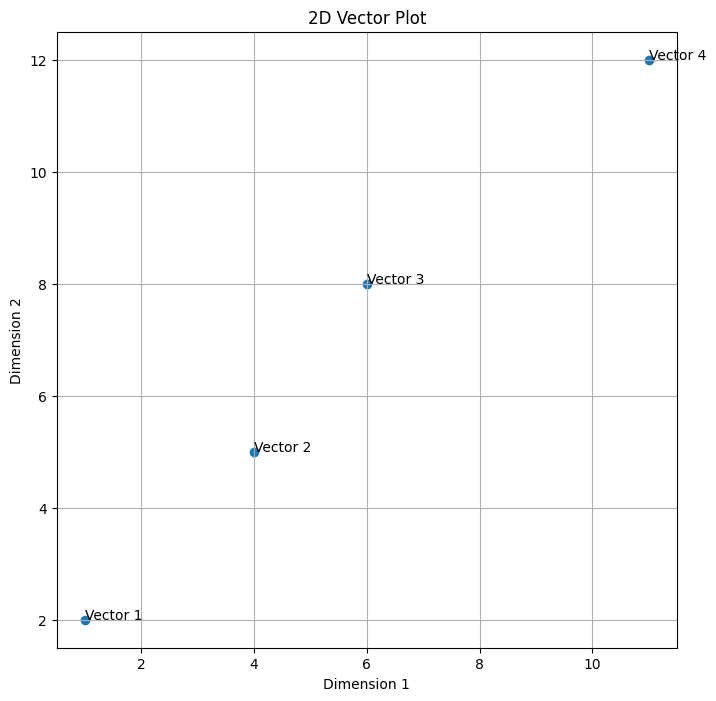

In [5]:
import matplotlib.pyplot as plt

def plot_2d_vectors(vectors, labels=None):
    """
    Plot a set of 2D vectors in 2D space.

    Parameters:
    vectors (list of tuples or numpy arrays): The list of 2D vectors to plot.
    labels (list of str, optional): Labels for the vectors.

    Returns:
    None
    """
    x = [v[0] for v in vectors]
    y = [v[1] for v in vectors]

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)

    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (x[i], y[i]))

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('2D Vector Plot')
    plt.grid(True)
    plt.show()

# Example usage:
vectors = [(1, 2), (4, 5), (6, 8), (11, 12)]
labels = ['Vector 1', 'Vector 2', 'Vector 3', 'Vector 4']
plot_2d_vectors(vectors, labels)
